## 7. Sobel Filtering 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
einstein = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)
assert einstein is not None
# Define the Sobel-X filter
sobel_x = np.array([[ 1,  0, -1],
               [ 2,  0, -2],
               [ 1,  0, -1]], dtype=np.float32)

# Define the Sobel-Y filter
sobel_y = np.array([[ 1,  2,  1],
               [ 0,  0,  0],
               [-1, -2, -1]], dtype=np.float32)




### a) Using the Existing Filter2D Function

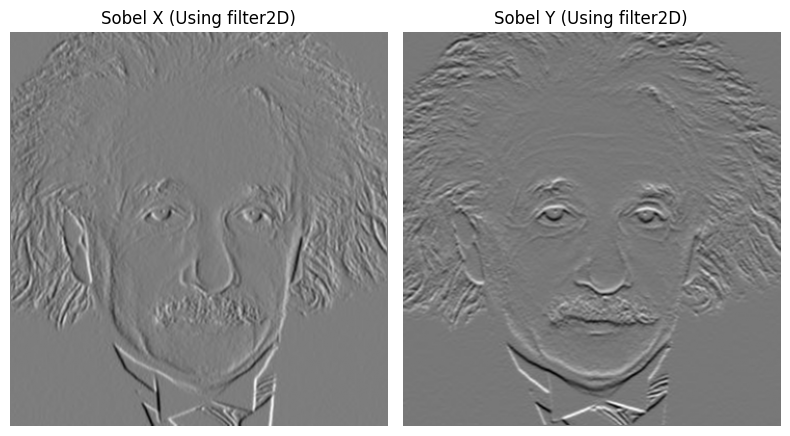

In [40]:
# Apply the Sobel filter in the X direction
sobel_x_filtered = cv.filter2D(einstein, cv.CV_32F, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = cv.filter2D(einstein, cv.CV_32F, sobel_y)

# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using filter2D)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using filter2D)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

### b) Using a Custom Code to Sobel Filter the Image

In [5]:
def apply_filter(image, filter):
    [rows, columns] = np.shape(image) # Get rows and columns of the image
    filtered_image = np.zeros(shape=(rows, columns)) # Create empty image
    
    for i in range(rows - 2):
        for j in range(columns - 2): # Process 2D convolution
            value = np.sum(np.multiply(filter, image[i:i + 3, j:j + 3])) 
            filtered_image[i + 1, j + 1] = value
    
    return filtered_image

In [6]:
# Apply the Sobel filter in the X direction
sobel_x_filtered = apply_filter(einstein, sobel_x)

# Apply the Sobel filter in the Y direction
sobel_y_filtered = apply_filter(einstein, sobel_y)

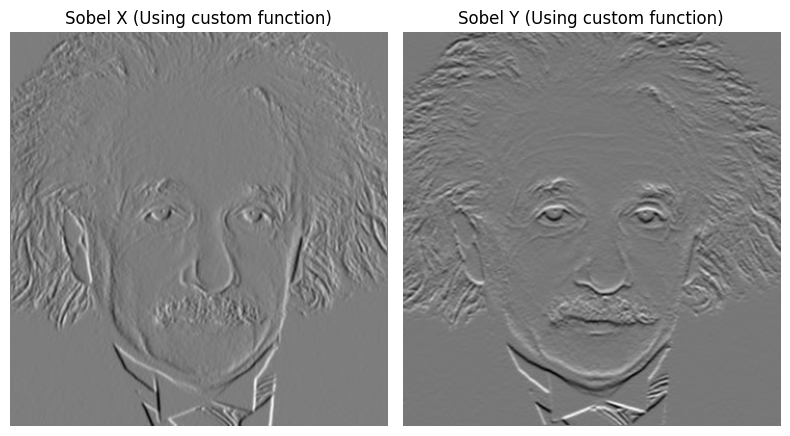

In [41]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 6))

ax[0].imshow(sobel_x_filtered, cmap='gray')
ax[0].set_title('Sobel X (Using custom function)')
ax[0].axis("off")
ax[1].imshow(sobel_y_filtered, cmap='gray')
ax[1].set_title('Sobel Y (Using custom function)')
ax[1].axis("off")

plt.tight_layout()
plt.show()

### c) Using the Associative Property of Convolution

In [12]:
# Sobel x filter seperated
sobel_x_vertical = np.array([[1], [2], [1]])
sobel_x_horizontal = np.array([[1, 0, -1]])

# Sobel y filter seperated
sobel_y_vertical = np.array([[1], [0], [-1]])
sobel_y_horizontal = np.array([[1, 2, 1]])

# Apply the vertical and horizontal filters consecutively
x_mid = cv.filter2D(einstein, cv.CV_64F, sobel_x_horizontal)
x_filtered_image = cv.filter2D(x_mid, cv.CV_64F, sobel_x_vertical)

y_mid = cv.filter2D(einstein, cv.CV_64F, sobel_y_vertical)
y_filtered_image = cv.filter2D(y_mid, cv.CV_64F, sobel_y_horizontal)


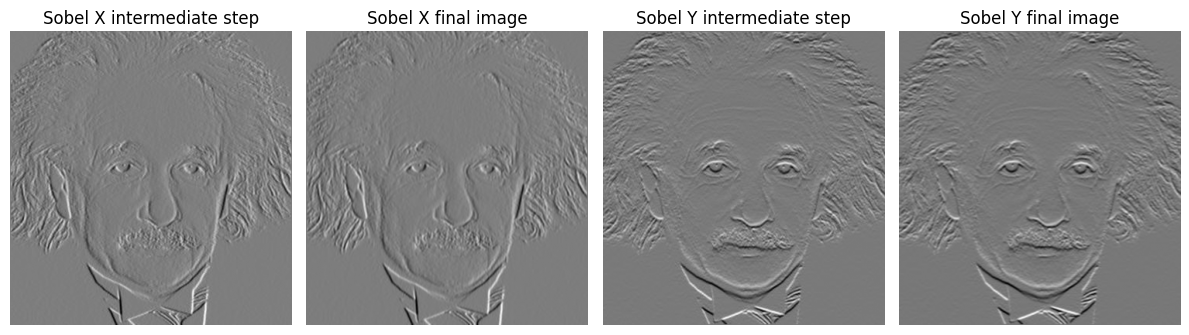

In [9]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 4, figsize=(12, 8))

ax[0].imshow(x_mid, cmap='gray')
ax[0].set_title('Sobel X intermediate step')
ax[0].axis("off")
ax[1].imshow(x_filtered_image, cmap='gray')
ax[1].set_title('Sobel X final image')
ax[1].axis("off")
ax[2].imshow(y_mid, cmap='gray')
ax[2].set_title('Sobel Y intermediate step')
ax[2].axis("off")
ax[3].imshow(y_filtered_image, cmap='gray')
ax[3].set_title('Sobel Y final image')
ax[3].axis("off")

plt.tight_layout()
plt.show()

# Approach

The Sobel operator was applied to the image using both OpenCV’s filter2D() function and a custom 2D convolution implementation. Additionally, separable convolution was used by decomposing the Sobel kernel into horizontal and vertical components to achieve the same result more efficiently.

#  Interpretation

All three methods produced identical gradient outputs, confirming the correctness of the custom and separable implementations. The separable approach reduced computational complexity while maintaining the same edge detection quality.